# Working with size distributions

compare with bins

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# from particula.particle import Particle
# from particula.rates import Rates
# from particula.dynamics import Solver
# from particula import u

# plot sizes
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = (16)

Total particle count:  9997


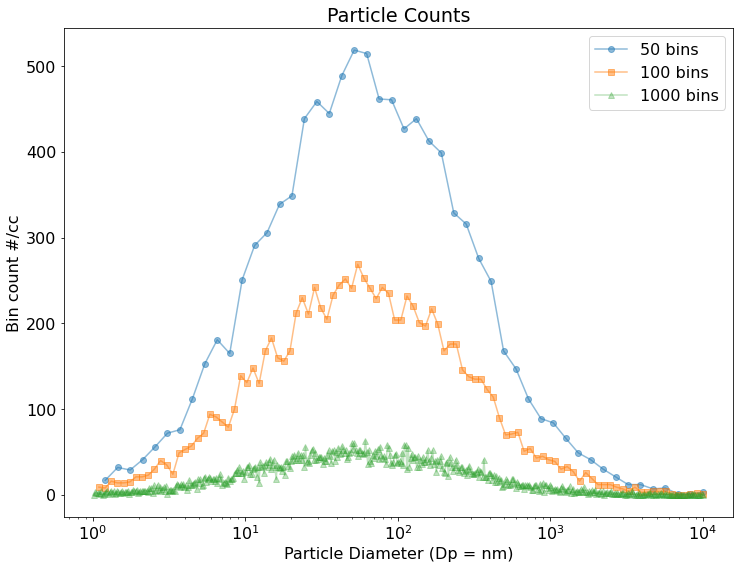

In [2]:
from matplotlib import markers


s = np.random.lognormal(4, 1.5, 10000)
s = s[s<10000] # remove outliers
s = np.abs(s)

total_count = len(s)
print("Total particle count: ", total_count)

bins50 = np.logspace(0, 4, 50)
bins100 = np.logspace(0, 4, 100)
bins1000 = np.logspace(0, 4, 500)

counts50, _ = np.histogram(s, bins=bins50)
counts100, _ = np.histogram(s, bins=bins100)
counts1000, _ = np.histogram(s, bins=bins1000)

fig, ax = plt.subplots(1, 1)
ax.set_xscale('log')
plt.plot(bins50[1:], counts50, alpha = 0.5, marker='o', label='50 bins')
plt.plot(bins100[1:], counts100, alpha=0.5, marker='s', label='100 bins')
plt.plot(bins1000[1:], counts1000, alpha=0.3, marker='^', label='1000 bins')
ax.set_xlabel('Particle Diameter (Dp = nm)')
ax.set_ylabel('Bin count #/cc')
ax.set_title('Particle Counts')
ax.legend()

In [3]:
print("Total particle count: ", total_count)
print("Bins 50: ", sum(counts50))
print("Bins 100: ", sum(counts100))
print("Bins 1000: ", sum(counts1000))

Total particle count:  9997
Bins 50:  9958
Bins 100:  9958
Bins 1000:  9958


We can normalize by the total number, that should help. 

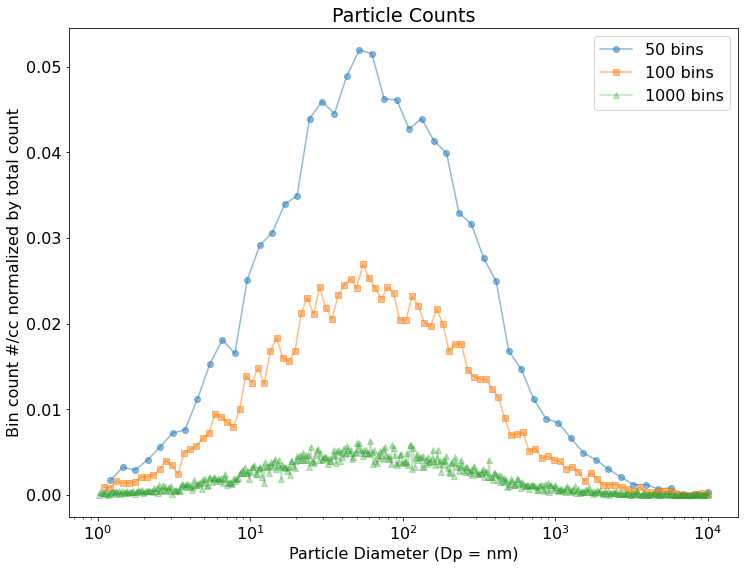

In [4]:
fig, ax = plt.subplots(1, 1)
ax.set_xscale('log')
plt.plot(bins50[1:], counts50/total_count, alpha = 0.5, marker='o', label='50 bins')
plt.plot(bins100[1:], counts100/total_count, alpha=0.5, marker='s', label='100 bins')
plt.plot(bins1000[1:], counts1000/total_count, alpha=0.3, marker='^', label='1000 bins')
ax.set_xlabel('Particle Diameter (Dp = nm)')
ax.set_ylabel('Bin count #/cc normalized by total count')
ax.set_title('Particle Counts')
ax.legend()

dN/dlogDp as a stable distribution

pdf of instrument motivation 
https://tsi.com/getmedia/1621329b-f410-4dce-992b-e21e1584481a/PR-001-RevA_Aerosol-Statistics-AppNote?ext=.pdf

$$
dN/dlogD_p = \frac{dN}{dlog(D_p)} = \frac{dN}{log(D_{p-upper})-log(D_{p-lower})}
$$

Where dN is the particle concentration in that size bin, and Dp is the particle diameter.

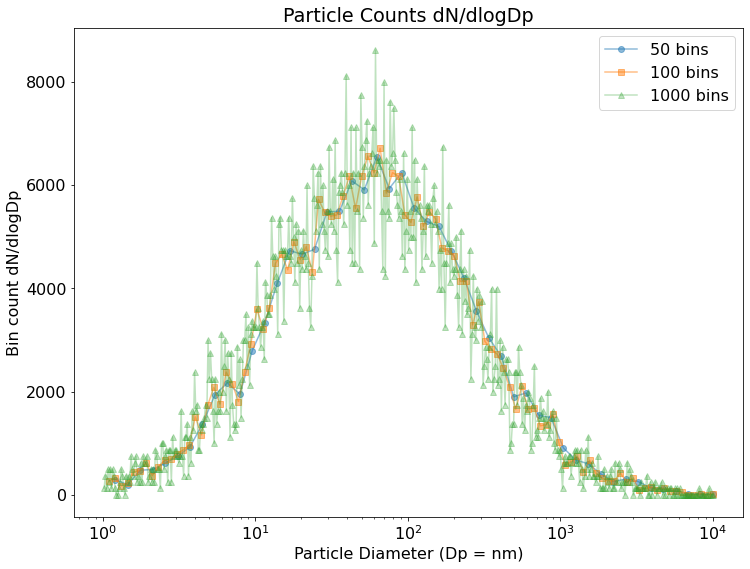

In [71]:
log_bins50 = np.log10(bins50[1:])-np.log10(bins50[:-1]) # bin width delta scaled by dp
counts50_dNdlogDp = counts50 / log_bins50

log_bins100 = np.log10(bins100[1:])-np.log10(bins100[:-1]) # bin width delta scaled by dp
counts100_dNdlogDp = counts100 / log_bins100

log_bins1000 = np.log10(bins1000[1:])-np.log10(bins1000[:-1]) # bin width delta scaled by dp
counts1000_dNdlogDp = counts1000 / log_bins1000

fig, ax = plt.subplots(1, 1)
ax.set_xscale('log')
plt.plot(bins50[1:], counts50_dNdlogDp, alpha = 0.5, marker='o', label='50 bins')
plt.plot(bins100[1:], counts100_dNdlogDp, alpha=0.5, marker='s', label='100 bins')
plt.plot(bins1000[1:], counts1000_dNdlogDp, alpha=0.3, marker='^', label='1000 bins')
ax.set_xlabel('Particle Diameter (Dp = nm)')
ax.set_ylabel('Bin count dN/dlogDp')
ax.set_title('Particle Counts dN/dlogDp')
ax.legend()

In [ ]:
def pdf_total(radius, pdf_distribution):
    return np.trapz(y=pdf_distribution, x=radius)

def pdf_volume_total(radius, pdf_distribution):
    return np.trapz(y=pdf_distribution* 4/3 * np.pi * radius**3, x=radius)

def pdf_to_pms(radius, pdf_distribution):
    # radius_bins = np.diff(radius)
    # pms_bins = [radius_bins] * np.diff(pdf_distribution)/2  #np.diff(pdf_distribution)*np.diff(radius)

    # particle_dist.distribution().m*np.diff(particle_dist.radius().m)[0]
    difrad = radius
    difrad[:-1] = np.diff(radius)
    difrad[-1] = difrad[-2]**2/difrad[-3]

    # pdf_distribution*np.diff(radius) #linear
    return pdf_distribution*difrad

def pms_total(distribution, axis=0):
    return np.sum(distribution, axis=axis)

def pms_volume_distribution(radius, pms_distribution):
    return (4/3 * np.pi * radius**3 * pms_distribution)

pms = pdf_to_pms(particle_dist.radius(), particle_dist.distribution())

print(f'total number pms, {pms_total(pms)}')

print(f'total number pdf, {pdf_total(particle_dist.radius(), particle_dist.distribution())}')

print(f'total volume pdf, {pdf_volume_total(particle_dist.radius(), particle_dist.distribution())}')

print(f'total volume pms, {pms_total(pms_volume_distribution(particle_dist.radius(), pms))}')
